# Supervised, Unsupervised and Reinforcement Learning

One of the ways of differentiating categories of machine learning algorithms is to split them into **supervised**, **unsupervised** and **reinforcement** learning methods. 

With **supervised** methods, the training data come with the outcome you are trying to predict--they are labeled. For example, with linear regression, we have linked input and output values and are predicting the function that relates them. With image classification, we might start with a set of images that are labeled as cats, dogs, people, etc., and then train the algorithm to learn to classify a new image into these classes.

With **unsupervised** methods, we have unlabeled data (no y-values or pre-defined categories) and ask the algorithm to learn patterns from the data itself. These methods usually try to categorize the observations.

With **reinforcement learning**, the training data is also unlabeled, but the system received feedback for its actions/categorizations. Game systems are a classic example of this--learn to play chess by playing games and learning what moves lead to a winning strategy. Robotics and autonomous vehicles are other applications--learn how to climb stairs by getting points for actions that leads to going up stairs.

There are also methods that mix these.

## Types of Supervised Learning

The two main types of supervised learning are **classification** and **regression**.

In **classification**, the response variable (y) is categorical or discrete. For example, this image is a cat, dog, bird, etc.; you do or do not have some disease; this plant is a desired crop or a weed to kill; etc.

In **regression**, the response variable (y) is continuous or numerical. in the automobile fuel efficiency data we've been working with, miles per gallon is the response variable and the regression approaches we've been looking at are finding the model that takes the input (hp) and predicts the output (mpg).

The image below from the [maplearn.ml package documentation](https://maplearn.readthedocs.io/en/latest/maplearn.ml.html) provides a nice visual of the general idea of classification and regression.

![Classification vs regression. Image from maplearn.ml documentation](images/classif_reg.maplearn.png)


## Types of classification

Many methods have been developed for classification and the list below is certainly not comprehensive. Nor can we hope to cover all of them in this class. But hopefully this list gives you a sense of the diversity and places to start looking.

* Linear Classifiers
  * Logistic regression
  * Naive Bayes classifier
  * Fisher’s linear discriminant
* Kernel methods
  * Support vector machines
  * Least squares support vector machines
* k-nearest neighbors
* Decision trees
  * Random forests
* Neural networks
* Learning vector quantization

## Logistic Regression

Despite its name, **logistic regression** is typically used in machine learning as a **classification** algorithm. Logistic regression estimates the probability of belonging to each class, given the values of the predictor variables (features). This is then typically used, in conjunction with a threshold to predict discrete (most often binary) class association--1/0, yes/no, true/false--based on input data. Logistic regression predicts the probability of occurrence of an event by fitting a **logit function**. 




A common example of logistic regression is the issue of classifying email as spam or not-spam. I found this [Introduction to Logistic Regression](https://courses.lumenlearning.com/introstats1/chapter/introduction-to-logistic-regression/) particularly helpful in preparing this.

Logistic regression is a generalized linear model where the outcome is a binary (two-levels) categorical variable. What we are looking for is actually **probabilities**: What is the probability of each possible outcome? Outcome 1 (spam) happens with the probability of $p_i$ and outcome 0 (not-spam) with the probability $1-p_i$.

The **odds** of an event are the ratio of the probability that the event occurs to the probability that it doesn't. 

$$ odds\,of\,event = \frac{p}{1-p} $$

Remember our standard linear regression equation:

$$ \hat{y} = \beta_0  + \beta_1x_1 + \beta_2x_2 ... \beta_ix_i$$

In this, $\hat{y}$ can have any range. To get a probability, we need to transform $\hat{y}$ such that it has values between 0 and 1. A common transformation is the **logit transformation**.

$$ logit(y) = ln(odds) = ln(\frac{p_i}{1-p_i}) $$

So we end up with:

$$  ln(\frac{p_i}{1-p_i}) = \beta_0  + \beta_1x_1 + \beta_2x_2 ... \beta_ix_i$$  

To solve for $p$, we can take the antilog and do a bunch of algebra to end up with:

$$ p = \frac{1}{1+e^{-(\beta_1x_1 + \beta_2x_2 ... \beta_ix_i)}} $$


### Logistic Regression Sigmoid Function

Logistic regression makes use of the **sigmoid function** pictured below. The sigmoid function has values very close to (but not equal to) 0 or 1 for most of its distribution. 

$$ 
    \sigma(x) = \frac{1}{1+e^{-x}} = \frac{1}{1+exp^{-x}}\\
$$
And think of $\sigma(x)$ as *y*.

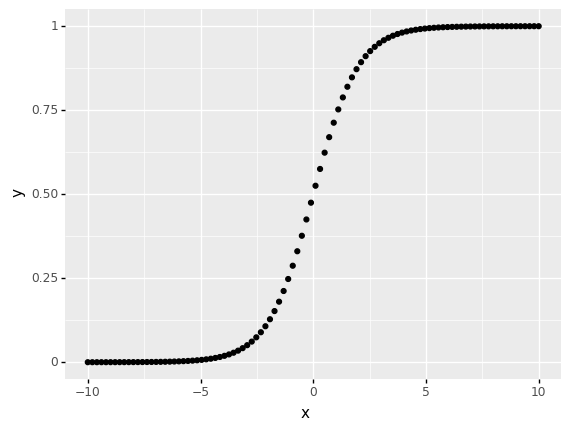

<ggplot: (164866529290)>

In [107]:
# Code to generate sigmoid graph below
import plotnine as pn
import numpy as np
import pandas as pd
x = np.linspace(-10,10, num=100)
y = 1/(1+np.exp(-x))

df = pd.DataFrame(x,y)

pn.ggplot(df, pn.aes(x='x', y='y')) + pn.geom_point()

The goal is to find the **logistic regression function**, such that the predicted responses are as close to the **actual response**, for each observation. Remember that this is a binary response, 0 or 1, but the output of the logistic regression model is a _probability_, not a class prediction. Thus, the requirement that the output be between 0 and 1 is because it is a probability, not because our class labels are 0 and 1.

### Logistic Regression Methodology

Logistic regression determines the **best predicted weights**, $b_0, b_1,..., b_i$, such that the function is as close as possible to all actual (observed) responses. Calculating the best weights using training data is called model training or fitting.


### Single Variable Logistic Regression example


In [108]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's make some data to work with
x = np.arange(10).reshape(-1, 1) # Reshape to column vector
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Question what are these data?

There are a number of options for the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier. For this example, we will use the `liblinear` solver--the algorithm used in the optimization step. This is mostly for two reasons...1) until recently this was the default(*lbfgs* is now default--[here is](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451) a good article on the options) and 2) it produces some "interesting" results to discuss. Certainly look at the options and play with different solvers.

In [109]:
# Create and fit a model using our data
model = LogisticRegression(solver='liblinear').fit(x,y)

In [110]:
# Let's look at the model parameters

print("Classes:", model.classes_)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Classes: [0 1]
Intercept: [-1.04608067]
Coefficients: [[0.51491375]]


### Log odds

Note that the coefficient here is also referred to as the log odds score or effect. For every one unit change in x, in this case, the odds of positivity increase by 0.51.  

In [111]:
# How does the model do?
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the output matrix above, each row corresponds to a single observation ($x$). The first column is the predicted probability of the output being the  $0^{th}$ class-- 0 or $(1-p(x))$. The second column is the predicted probability of class 1, $p(x)$.

In [112]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])



The above example and image below come from the Real Python blog [*Logistic Regression in Python*](https://realpython.com/logistic-regression-python/).

![](images/log-reg-5_real_python.png)

The green circles represent the actual responses ($y$) that are correctly predicted by the model. The red x shows the incorrect prediction. The solid line is the estimated logistic function $p(x)$, and the grey squares along that line are the predicted responses (second column in table). The black dashed line is the logit, $f(x)$.

As the plot above and the `model.predict(x)` output show, the model correctly classifies nine of the 10 observations. As such, the accuracy is 9/10=0.9, which is available with the `model.score()` method:

In [113]:
# Check the model score

model.score(x,y)

0.9

### Classification metrics

The `model.score()` tells us something about our model's performance, but not really everything we would like to know. 

Taking a different classification problem, let's look at a model that classifies images as either cat or not cat. Here are common terms used to describe classification success:

![Cat classification success](images/classification_success.png)

One way of gaining insight into our model is what is called a **confusion matrix**. This summarizes the true and false positive and negative counts.

In [115]:
#Show the confusion matrix
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[3 1]
 [0 6]]


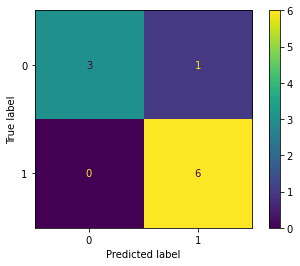

In [116]:
# Plot the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

### Question

What kind of error is our model making?

### Additional Classification Metrics

For the following, we will refer to the 0 class as negative and the 1 class as positive. 

**Precision**: The ability of the classifier not to label as positive (1) a sample that is negative (0). Out of those predicted positive, how many are actual positive.

$$ Precision =  \frac{True\,Positive}{True\,Positive\,+\,False\,Positive} =  \frac{True\,Positive}{Total\,Predicted\,Positive} $$

Precision is a good measure when the cost of False Positive is high. E.g. Email spam filter. If lots of email is falsely flagged as spam and discarded, you might miss important emails. Precision is also called the *positive predictive value*. There is also a *negative predictive value* that is the ratio of true negatives over the sum of true and false negatives.

**Recall/Sensitivity**:  The ability of the classifier to find all the positive (1) samples. How many of the actually positives does the model label as positive.

$$ Recall = \frac{True\,Positive}{True\,Positive + False\,Negative} =  \frac{True\,Positive}{Total\,Actual\,Positive} $$

Recall is a good measure when the cost of False Negative is high. E.g. disease diagnosis. If a sick patient is predicted as not sick, the cost associated with a false negative is high. Recall is also called *sensitivity* or *True Positive Rate* (**TPR**).

**Specificity**: The ability of the classifier to fine all the negative (0) samples. How many of the actually negatives does the model label as negative.

$$ Specificity = \frac{True\,Negative}{True\,Negative + False\,Positive} = \frac{True\,Negative}{Total\,Actual\,Negative} $$

Since we'll use this later, 1 - Specificity is known as the *False Positivity Rate (**FPR**)*.

**F1-Score** also known as F-beta: A weighted harmonic mean of the precision and recall, where and F-beta score reaches its best value at 1 and worst score at 0. 


The F-beta score weighs recall more than precision by a factor of `beta`. `beta=1.0` means recall and precision are equally important. 


$$ F1 = 2\frac{Precision\,*\,Recall}{Precision\,+\,Recall} $$

** Support**: The number of samples in each class.
  
**Accuracy**: Total number of correct predictions over all predictions. Only accurate with balanced models (relatively equal frequency of 0/1)



In [117]:
# Another set of classification metrics

print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



### Logistic regression example

For this example, let's predict if a patient will develop (1) diabetes or not (0). We have several variables that can be used for this prediction.


In [167]:
import pandas as pd
import numpy as np
import plotnine as pn
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes = pd.read_csv("data/diabetes.csv")


diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [168]:
# Setup train/test data

# Get the y values and drop from df
y= diabetes.Outcome
x= diabetes.drop(columns='Outcome')

# Split to 75% train, 25% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [169]:
# Create and fit model
model = LogisticRegression().fit(x_train,y_train)

In [170]:
# Test the model

# Predict ys using model and test data
y_pred = model.predict(x_test)

# Get model.score for both training and test data
print(f'Model score on training data: {model.score(x_train,y_train)}')
print(f'Model score on testing data: {model.score(x_test,y_test)}')


Model score on training data: 0.7708333333333334
Model score on testing data: 0.7916666666666666


In [171]:
# See the confusion matrix

confusion_matrix(y_test,y_pred)

array([[115,  15],
       [ 25,  37]], dtype=int64)

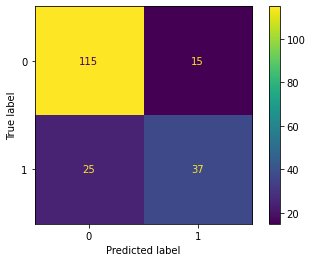

In [172]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [173]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [180]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [189]:
print(model.coef_)

pd.DataFrame(np.transpose(model.coef_), x.columns, columns=['coef']).sort_values(by='coef', ascending=False)

[[ 0.10303231  0.03481652 -0.01157502  0.00955376 -0.00132856  0.07759469
   1.27094835  0.02155703]]


,coef
DiabetesPedigreeFunction,1.270948
Pregnancies,0.103032
BMI,0.077595
Glucose,0.034817
Age,0.021557
SkinThickness,0.009554
Insulin,-0.001329
BloodPressure,-0.011575


### Receiver Operator Characteristic (ROC) Curve and Area Under the Curve (AUC)

Originating [rating radar operators in the 1940s](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#History), a ROC curve is a way to visualize the tradeoff between sensitivity and specificity.

So far, we have been assuming anything below 0.5 is class 0 and anything about 0.5 is class 1. But that is one of any number of cutoffs and we could change the classification threshold.

**What effect would having a lower threshold have on false positive and negative rates?**

**When might you want to have more false positives? or more false positives?**

Remember:
* Recall = Sensitivity = TPR = true positives / total actual positives
* Specificity = true negatives / total actual negatives
  * 1 - Specificity = FPR

The ROC curve plots these against each other at classification thresholds from 0 to 1. Often a line for a random model (randomly classify observations as 0/1--should be 50% accurate) is also added.

The **Area Under the Curve (AUC)** is an aggregate measure of model performance across all classification thresholds. 

The higher the AUC, the better the model.


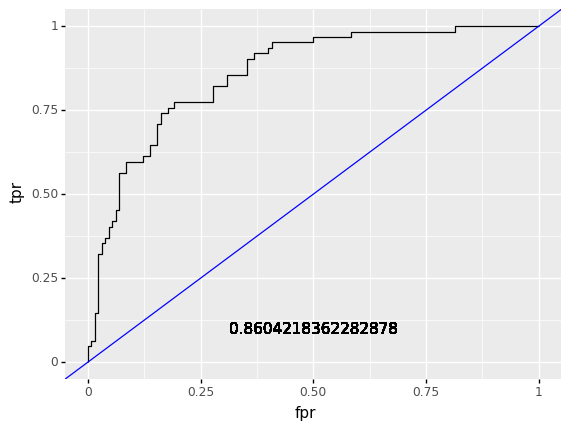

<ggplot: (164863289953)>

In [174]:
# ROC Curve

y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, thresh = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC w/ RocCurveDisplay
#display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,                                  estimator_name='example estimator')
#display.plot() 

# Plot ROC w/ plotnine
df= pd.DataFrame(fpr,tpr)
pn.ggplot(df, pn.aes(x='fpr', y='tpr')) + pn.geom_line() + pn.geom_text(pn.aes(x= 0.5, y= 0.1, label=auc)) + pn.geom_abline(intercept=0, slope=1, color='blue')

The image below is from the great article by Ruchi Toshniwal [Demystifying ROC Curves](https://towardsdatascience.com/demystifying-roc-curves-df809474529a) and shows an example ROC curve color coded to also show the threshold value.

![ROC Curve color coded bt threshold from Ruchi Toshniwal](images/ROC_curve_thresholds.png)

